In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

import tensorflow as tf
import keras as kr

from keras import Sequential
from keras.layers import Conv1D,MaxPooling1D,Flatten,Dense

import os 
import pickle 

from datamake import ecg_dataframe

In [2]:
#data get

In [3]:
x ,y = ecg_dataframe("C:\\seb\\ecg_detection\\segment\\set\\0101")

In [4]:
x
#x.shape
#(295, 288)

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
1,-0.515,-0.515,-0.515,-0.535,-0.545,-0.555,-0.535,-0.530,-0.505,-0.525,...,-0.160,-0.195,-0.225,-0.270,-0.260,-0.235,-0.230,-0.250,-0.255,-0.275
2,-0.505,-0.520,-0.530,-0.565,-0.580,-0.595,-0.555,-0.530,-0.520,-0.530,...,-0.290,-0.295,-0.305,-0.315,-0.300,-0.295,-0.290,-0.290,-0.295,-0.300
3,-0.245,-0.255,-0.250,-0.260,-0.265,-0.290,-0.295,-0.300,-0.290,-0.295,...,-0.310,-0.315,-0.335,-0.345,-0.340,-0.330,-0.325,-0.325,-0.335,-0.350
4,0.045,0.030,0.030,0.005,0.000,-0.005,-0.025,-0.035,-0.020,-0.005,...,-0.905,-0.875,-0.855,-0.875,-0.870,-0.845,-0.830,-0.820,-0.810,-0.835
5,0.615,0.550,0.465,0.390,0.320,0.260,0.235,0.195,0.140,0.080,...,-0.520,-0.500,-0.500,-0.535,-0.570,-0.595,-0.650,-0.695,-0.765,-0.820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.870,0.555,0.300,0.145,0.035,-0.025,-0.040,-0.035,-0.055,-0.075,...,0.045,0.030,0.020,0.015,0.010,0.010,0.020,0.030,0.045,0.040
292,-0.275,-0.275,-0.290,-0.310,-0.335,-0.335,-0.360,-0.375,-0.380,-0.400,...,-0.010,-0.030,-0.025,-0.040,-0.045,-0.045,-0.040,-0.030,-0.015,-0.010
293,-0.325,-0.310,-0.250,-0.165,-0.010,0.175,0.385,0.600,0.795,0.990,...,-0.235,-0.230,-0.215,-0.210,-0.210,-0.225,-0.235,-0.225,-0.225,-0.225
294,-0.015,-0.025,-0.030,-0.035,-0.030,-0.020,-0.010,-0.015,-0.020,-0.040,...,0.115,0.100,0.110,0.125,0.125,0.115,0.120,0.115,0.120,0.115


In [5]:
y

,0
1,Q
2,Q
3,N
4,N
5,Q
...,...
291,V
292,V
293,V
294,S


In [6]:
x=x.to_numpy()

In [7]:
x

array([[-0.515, -0.515, -0.515, ..., -0.25 , -0.255, -0.275],
       [-0.505, -0.52 , -0.53 , ..., -0.29 , -0.295, -0.3  ],
       [-0.245, -0.255, -0.25 , ..., -0.325, -0.335, -0.35 ],
       ...,
       [-0.325, -0.31 , -0.25 , ..., -0.225, -0.225, -0.225],
       [-0.015, -0.025, -0.03 , ...,  0.115,  0.12 ,  0.115],
       [-0.35 , -0.345, -0.335, ..., -0.3  , -0.305, -0.29 ]])

In [8]:
type(x)

numpy.ndarray

In [9]:
x_row,x_col = x.shape

In [10]:
x = x.reshape(x_row,x_col, 1)

In [11]:
x

array([[[-0.515],
        [-0.515],
        [-0.515],
        ...,
        [-0.25 ],
        [-0.255],
        [-0.275]],

       [[-0.505],
        [-0.52 ],
        [-0.53 ],
        ...,
        [-0.29 ],
        [-0.295],
        [-0.3  ]],

       [[-0.245],
        [-0.255],
        [-0.25 ],
        ...,
        [-0.325],
        [-0.335],
        [-0.35 ]],

       ...,

       [[-0.325],
        [-0.31 ],
        [-0.25 ],
        ...,
        [-0.225],
        [-0.225],
        [-0.225]],

       [[-0.015],
        [-0.025],
        [-0.03 ],
        ...,
        [ 0.115],
        [ 0.12 ],
        [ 0.115]],

       [[-0.35 ],
        [-0.345],
        [-0.335],
        ...,
        [-0.3  ],
        [-0.305],
        [-0.29 ]]])

In [12]:
number = [0,1,2,3,4]
label = ['N','S','V','F','Q']

In [13]:
y = y.replace(label,number)

In [14]:
y

,0
1,4
2,4
3,0
4,0
5,4
...,...
291,2
292,2
293,2
294,1


In [15]:
y=y.to_numpy()
y_row,y_col = y.shape
y = y.reshape(y_row,y_col, 1)

In [16]:
y

array([[[4]],

       [[4]],

       [[0]],

       [[0]],

       [[4]],

       [[4]],

       [[4]],

       [[4]],

       [[0]],

       [[4]],

       [[0]],

       [[2]],

       [[2]],

       [[2]],

       [[0]],

       [[2]],

       [[2]],

       [[0]],

       [[2]],

       [[0]],

       [[2]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[1]],

       [[0]],

       [[1]],

       [[0]],

       [[0]],

       [[2]],

       [[0]],

       [[1]],

       [[0]],

       [[1]],

       [[0]],

       [[2]],

       [[2]],

       [[2]],

       [[2]],

       [[0]],

       [[2]],

       [[2]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[2]],

       [[0]],

       [[0]],

       [[1]],

       [[1]],

       [[0]],

       [[2]],

       [[2]],

       [[2]],

       [[2]],

       [[2]],

       [[2]],

       [[0]],

       [[2]],

       [[2]],

       [[2

In [17]:
#model start
model = Sequential()

In [18]:
model.add(Conv1D(128,6,input_shape=[288,1],activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128,6,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(5,activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 283, 128)          896       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 141, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 136, 128)          98432     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 68, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 8704)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 43525     
Total params: 142,853
Trainable params: 142,853
Non-trainable params: 0
__________________________________________________

In [20]:
model.compile(loss='sparse_categorical_crossentropy' ,optimizer='adam',metrics=['accuracy'])

In [21]:
model.fit(x,y,epochs=500)

Epoch 1/500
10/10 [==============================] - 0s 15ms/step - loss: 1.4370 - accuracy: 0.4169
Epoch 2/500
10/10 [==============================] - 0s 15ms/step - loss: 1.0843 - accuracy: 0.6169
Epoch 3/500
10/10 [==============================] - 0s 15ms/step - loss: 0.9008 - accuracy: 0.6712
Epoch 4/500
10/10 [==============================] - 0s 15ms/step - loss: 0.8165 - accuracy: 0.7017
Epoch 5/500
10/10 [==============================] - 0s 16ms/step - loss: 0.7648 - accuracy: 0.6814
Epoch 6/500
10/10 [==============================] - 0s 15ms/step - loss: 0.7083 - accuracy: 0.7186
Epoch 7/500
10/10 [==============================] - 0s 15ms/step - loss: 0.6054 - accuracy: 0.7627
Epoch 8/500
10/10 [==============================] - 0s 16ms/step - loss: 0.5473 - accuracy: 0.7661
Epoch 9/500
10/10 [==============================] - 0s 16ms/step - loss: 0.5560 - accuracy: 0.7593
Epoch 10/500
10/10 [==============================] - 0s 15ms/step - loss: 0.5124 - accuracy: 0.8102

In [ ]:
#model fit check

In [83]:
'''
ex01 : N , S, V, F : 70개씩 랜덤 SELECT
       Q제외 
RESULT : 0.8000
'''

'\nex01 : N , S, V, F : 70개씩 랜덤 SELECT\n       Q제외 \nRESULT : 0.8000\n'

In [85]:
#check
x ,y= ecg_dataframe("C:\\seb\\ecg_detection\\segment\\set\\01\\2_predict\\ex1")

In [86]:
x=x.to_numpy()
x_row,x_col = x.shape
x = x.reshape(x_row,x_col, 1)
y = y.replace(label,number)
y=y.to_numpy()
y_row,y_col = y.shape
y = y.reshape(y_row,y_col, 1)

In [87]:
print(len(x),len(y))

280 280


In [88]:
print("Evaluate on test data")
results = model.evaluate(x, y)
print("test loss, test acc:", results)

Evaluate on test data
9/9 [==============================] - 0s 5ms/step - loss: 3.5412 - accuracy: 0.8000
test loss, test acc: [3.5411834716796875, 0.800000011920929]


In [89]:
'''
ex02 : N , S, V, F : 70개씩 랜덤 SELECT
       Q : 15개 전체
RESULT : 0.8576
Opinion : q비트 학습데이터 15개 -> 테스트 데이터 15개로 돌아가서 더 높게 나온듯 하다
'''

'\nex02 : N , S, V, F : 70개씩 랜덤 SELECT\n       Q : 15개 전체\nRESULT : 0.8576\nOpinion : q비트 학습데이터 15개 -> 테스트 데이터 15개로 돌아가서 더 높게 나온듯 하다\n'

In [114]:
x ,y= ecg_dataframe("C:\\seb\\ecg_detection\\segment\\set\\01\\2_predict\\ex2")

In [115]:
x=x.to_numpy()
x_row,x_col = x.shape
x = x.reshape(x_row,x_col, 1)
y = y.replace(label,number)
y=y.to_numpy()
y_row,y_col = y.shape
y = y.reshape(y_row,y_col, 1)

In [116]:
print(len(x),len(y))

295 295


In [102]:
print("Evaluate on test data")
results = model.evaluate(x, y)
print("test loss, test acc:", results)

Evaluate on test data
1/1 [==============================] - 0s 10ms/step - loss: 1.5422 - accuracy: 0.0000e+00
test loss, test acc: [1.5421793460845947, 0.0]


In [95]:
'''
ex02 : N 1개
RESULT : 0 (N)
        array([9.9440467e-01, 5.5952333e-03, 6.5084940e-08, 6.0220245e-12,
       2.0485998e-10], dtype=float32)
'''

'\nex02 : N 1개\nRESULT : array([9.9440467e-01, 5.5952333e-03, 6.5084940e-08, 6.0220245e-12,\n       2.0485998e-10], dtype=float32)\n'

In [117]:
x ,y= ecg_dataframe("C:\\seb\\ecg_detection\\segment\\set\\01\\2_predict\\ex3")
x=x.to_numpy()
x_row,x_col = x.shape
x = x.reshape(x_row,x_col, 1)
y = y.replace(label,number)
y=y.to_numpy()
y_row,y_col = y.shape
y = y.reshape(y_row,y_col, 1)

In [118]:
print(y)

[[[0]]]


In [119]:
predict = model.predict(x)

In [120]:
predict[0]

array([9.9983931e-01, 1.7057737e-06, 1.5666502e-04, 4.5904810e-18,
       2.4240189e-06], dtype=float32)

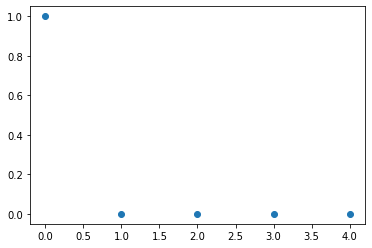

In [121]:
plt.plot(predict[0],"o")